In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import lab2rgb
from skimage.color import rgb2lab
import sys
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
 
# representative RGB colours for each label, for nice display
COLOUR_RGB = {
    'red': (255, 0, 0),
    'orange': (255, 112, 0),
    'yellow': (255, 255, 0),
    'green': (0, 231, 0),
    'blue': (0, 0, 255),
    'purple': (185, 0, 185),
    'brown': (117, 60, 0),
    'pink': (255, 184, 184),
    'black': (0, 0, 0),
    'grey': (150, 150, 150),
    'white': (255, 255, 255),
}
name_to_rgb = np.vectorize(COLOUR_RGB.get, otypes=[np.uint8, np.uint8, np.uint8])

In [40]:
def plot_predictions(model, lum=67, resolution=300):
    """
    Create a slice of LAB colour space with given luminance; predict with the model; plot the results.
    """
    wid = resolution
    hei = resolution
    n_ticks = 5

    # create a hei*wid grid of LAB colour values, with L=lum
    ag = np.linspace(-100, 100, wid)
    bg = np.linspace(-100, 100, hei)
    aa, bb = np.meshgrid(ag, bg)
    ll = lum * np.ones((hei, wid))
    lab_grid = np.stack([ll, aa, bb], axis=2)

    # convert to RGB for consistency with original input
    X_grid = lab2rgb(lab_grid)

    # predict and convert predictions to colours so we can see what's happening
    y_grid = model.predict(X_grid.reshape((-1, 3)))
    pixels = np.stack(name_to_rgb(y_grid), axis=1) / 255
    pixels = pixels.reshape((hei, wid, 3))

    # plot input and predictions
    plt.figure(figsize=(10, 5))
    plt.suptitle('Predictions at L=%g' % (lum,))
    plt.subplot(1, 2, 1)
    plt.title('Inputs')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.ylabel('B')
    plt.imshow(X_grid.reshape((hei, wid, -1)))

    plt.subplot(1, 2, 2)
    plt.title('Predicted Labels')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.imshow(pixels)
    
def convert_colors(X):
    return rgb2lab(X)
    

In [3]:
# data = pd.read_csv(infile)
# X = data # array with shape (n, 3). Divide by 255 so components are all 0-1.
# y = data # array with shape (n,) of colour words.

# # TODO: build model_rgb to predict y from X.
# # TODO: print model_rgb's accuracy score

# # TODO: build model_lab to predict y from X by converting to LAB colour first.
# # TODO: print model_lab's accuracy score

# plot_predictions(model_rgb)
# plt.savefig('predictions_rgb.png')
# plot_predictions(model_lab)
# plt.savefig('predictions_lab.png')

In [28]:
data = pd.read_csv('colour-data.csv')
X = data[['R', 'G', 'B']]/255
y = data['Label']
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

model_rgb = GaussianNB()
model_rgb.fit(X_train, y_train)
print(model_rgb.score(X_valid, y_valid))

0.5598173515981735


/Users/JeffWang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


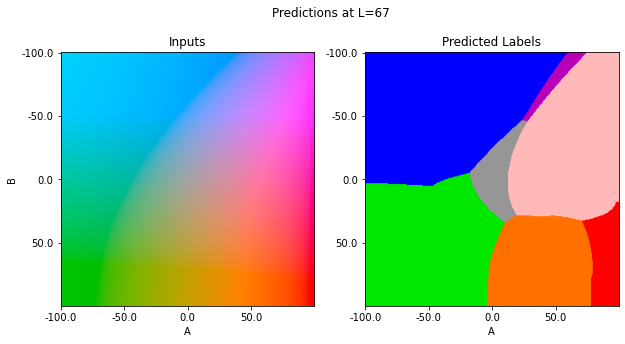

In [27]:
plot_predictions(model_rgb)

In [45]:
model_lab = make_pipeline(FunctionTransformer(convert_colors, validate=True), GaussianNB())
model_lab.fit(X_train, y_train)
print(model_lab.score(X_valid, y_valid))

0.6054794520547945


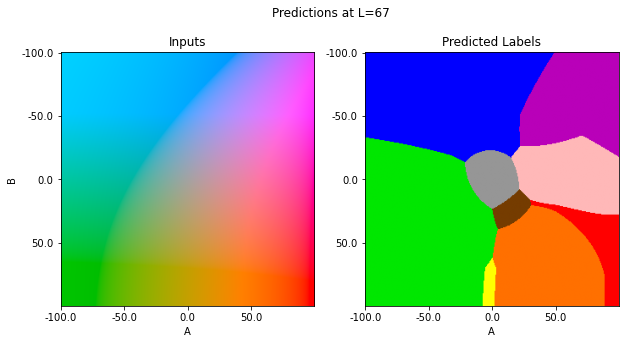

In [44]:
plot_predictions(model_lab)

array([[ 24.87188624,  45.89937025, -56.71643389],
       [ 93.01156478, -22.02268528,  -9.84461018],
       [ 38.48609161,  17.15640781, -35.27992412],
       ...,
       [ 37.80959017,  52.43051357, -76.44556259],
       [ 45.19638951,  74.27378967, -45.82429662],
       [ 15.64418013,   9.08763218, -19.01825223]])